In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
#path to project
path = r'/Users/rendo/A6_Shootings'

In [3]:
Shootings = pd.read_csv(os.path.join(path, '02 Data','prepared Data','Mass_murders.csv'))

In [4]:
Shootings

,Unnamed: 0,Incident ID,Incident Date,State,City Or County,Address,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested
0,0,2728246,12-Oct-23,Minnesota,Princeton,200 block of 190th Ave NE,0,5,0,1,1
1,1,2727876,10-Oct-23,Wisconsin,Madison,116 Milky Way,1,3,0,0,0
2,2,2725771,8-Oct-23,Illinois,Chicago,316 W Erie St,0,8,0,0,0
3,3,2725838,8-Oct-23,Pennsylvania,Indiana,640 N 5th Ave,1,8,0,0,0
4,4,2726444,8-Oct-23,Louisiana,Gonzales,616 N Tobey Ave,0,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3079,3091,742542,4-Jan-17,California,Fontana,14520 Village Dr,3,1,0,0,1
3080,3092,742001,3-Jan-17,Texas,Allen,500 block of Hawthorne Drive,0,4,0,0,1
3081,3093,743282,1-Jan-17,Mississippi,Winstonville,114 North Greyer Street,0,5,0,0,0
3082,3094,739451,1-Jan-17,Texas,Dallas,9220 Skillman Street,1,3,0,0,0


In [5]:
# Define data types for specific columns
data_types = {
    'Incident Date': 'datetime64'
}

In [6]:
parse_dates = ['Incident Date']

In [7]:
file_path = os.path.join(path, '02 Data','prepared data','Mass_murders.csv')

In [8]:
Shootings = pd.read_csv(file_path, parse_dates=parse_dates)

In [9]:
Shootings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3084 entries, 0 to 3083
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         3084 non-null   int64         
 1   Incident ID        3084 non-null   int64         
 2   Incident Date      3084 non-null   datetime64[ns]
 3   State              3084 non-null   object        
 4   City Or County     3084 non-null   object        
 5   Address            3084 non-null   object        
 6   Victims Killed     3084 non-null   int64         
 7   Victims Injured    3084 non-null   int64         
 8   Suspects Killed    3084 non-null   int64         
 9   Suspects Injured   3084 non-null   int64         
 10  Suspects Arrested  3084 non-null   int64         
dtypes: datetime64[ns](1), int64(7), object(3)
memory usage: 265.2+ KB


In [10]:
day_counts = Shootings.groupby( Shootings['Incident Date'].dt.date)['Incident Date'].count()

In [11]:
day_counts

Incident Date
2017-01-01    3
2017-01-03    1
2017-01-04    1
2017-01-06    2
2017-01-07    1
             ..
2023-10-06    3
2023-10-07    2
2023-10-08    3
2023-10-10    1
2023-10-12    1
Name: Incident Date, Length: 1453, dtype: int64

In [12]:
Incident_avg = Shootings.groupby('Incident Date')['Suspects Arrested'].mean()

In [13]:
Incident_avg

Incident Date
2017-01-01    0.0
2017-01-03    1.0
2017-01-04    1.0
2017-01-06    3.0
2017-01-07    1.0
             ... 
2023-10-06    0.0
2023-10-07    0.0
2023-10-08    0.0
2023-10-10    0.0
2023-10-12    1.0
Name: Suspects Arrested, Length: 1453, dtype: float64

In [14]:
result = pd.DataFrame({'date': day_counts.index, 'Incident Date': day_counts.values, 'avg': Incident_avg.values})

In [15]:
result

,date,Incident Date,avg
0,2017-01-01,3,0.0
1,2017-01-03,1,1.0
2,2017-01-04,1,1.0
3,2017-01-06,2,3.0
4,2017-01-07,1,1.0
...,...,...,...
1448,2023-10-06,3,0.0
1449,2023-10-07,2,0.0
1450,2023-10-08,3,0.0
1451,2023-10-10,1,0.0


In [16]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1453 non-null   object 
 1   Incident Date  1453 non-null   int64  
 2   avg            1453 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 34.2+ KB


In [17]:
# Set the "Date" column as the index

from datetime import datetime

result['datetime'] = pd.to_datetime(result['date']) # Create a datetime column from "Date.""
result = result.set_index('datetime') # Set the datetime as the index of the dataframe.
result.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
result.head()

,Incident Date,avg
datetime,,
2017-01-01,3,0.0
2017-01-03,1,1.0
2017-01-04,1,1.0
2017-01-06,2,3.0
2017-01-07,1,1.0


In [18]:
# Reset index so that you can use the "Date" column as a filter

result_2 = result.reset_index()

In [19]:
result_2.head()

,datetime,Incident Date,avg
0,2017-01-01,3,0.0
1,2017-01-03,1,1.0
2,2017-01-04,1,1.0
3,2017-01-06,2,3.0
4,2017-01-07,1,1.0


In [20]:
result_3 = result_2[['datetime','Incident Date']]

In [21]:
result_3

,datetime,Incident Date
0,2017-01-01,3
1,2017-01-03,1
2,2017-01-04,1
3,2017-01-06,2
4,2017-01-07,1
...,...,...
1448,2023-10-06,3
1449,2023-10-07,2
1450,2023-10-08,3
1451,2023-10-10,1


In [22]:
# Reset index so that you can use the "Date" column as a filter

result_3 = result.reset_index()

In [23]:
result_3

,datetime,Incident Date,avg
0,2017-01-01,3,0.0
1,2017-01-03,1,1.0
2,2017-01-04,1,1.0
3,2017-01-06,2,3.0
4,2017-01-07,1,1.0
...,...,...,...
1448,2023-10-06,3,0.0
1449,2023-10-07,2,0.0
1450,2023-10-08,3,0.0
1451,2023-10-10,1,0.0


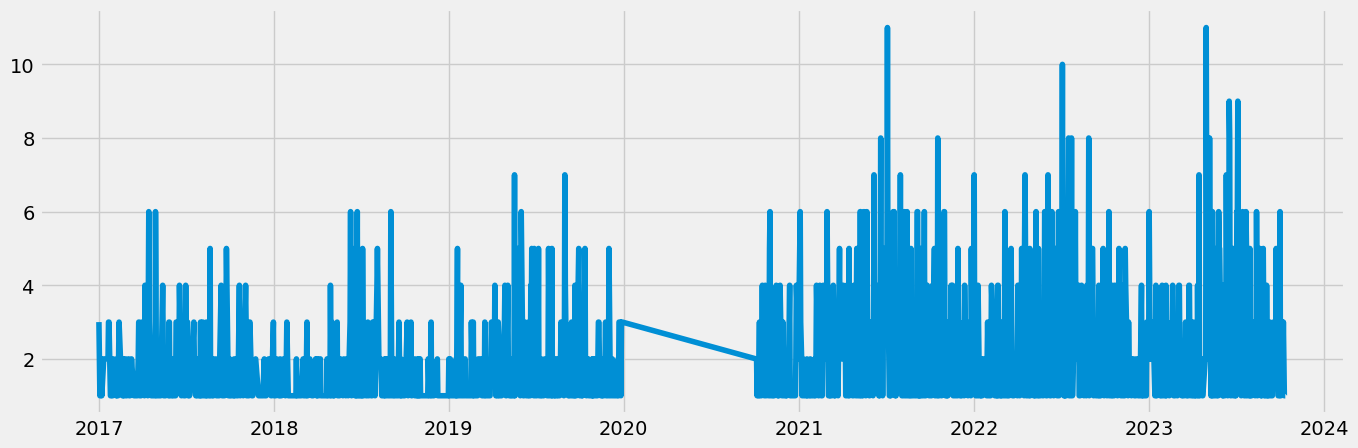

In [24]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(day_counts)

### This shows that mass shootings over the years have increased. Further analysis would be required to see if there is a season where more shootings occur.

In [25]:
day_counts

Incident Date
2017-01-01    3
2017-01-03    1
2017-01-04    1
2017-01-06    2
2017-01-07    1
             ..
2023-10-06    3
2023-10-07    2
2023-10-08    3
2023-10-10    1
2023-10-12    1
Name: Incident Date, Length: 1453, dtype: int64

In [26]:
# Check for missing values (you shouldn't have any)

day_counts.isnull().sum() 

0

In [27]:
result

,Incident Date,avg
datetime,,
2017-01-01,3,0.0
2017-01-03,1,1.0
2017-01-04,1,1.0
2017-01-06,2,3.0
2017-01-07,1,1.0
...,...,...
2023-10-06,3,0.0
2023-10-07,2,0.0
2023-10-08,3,0.0


In [28]:
column_to_drop = 'avg'

In [29]:
result = result.drop(column_to_drop, axis=1)

In [30]:
result

,Incident Date
datetime,
2017-01-01,3
2017-01-03,1
2017-01-04,1
2017-01-06,2
2017-01-07,1
...,...
2023-10-06,3
2023-10-07,2
2023-10-08,3


In [49]:
# Reset index so that you can use the "Date" column as a filter

result_1 = result.reset_index()

In [50]:
result_1

,datetime,Incident Date
0,2017-01-01,3
1,2017-01-03,1
2,2017-01-04,1
3,2017-01-06,2
4,2017-01-07,1
...,...,...
1448,2023-10-06,3
1449,2023-10-07,2
1450,2023-10-08,3
1451,2023-10-10,1


In [51]:
result_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   datetime       1453 non-null   datetime64[ns]
 1   Incident Date  1453 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 22.8 KB


In [52]:
time_series = result_1['Incident Date']

In [53]:
result_1['datetime'] = pd.to_datetime(result_1['datetime'])

In [54]:
result_1.set_index('datetime', inplace=True)

In [55]:
 pd.date_range(start = '2017-01-01', end ='2023-10-12')

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2023-10-03', '2023-10-04', '2023-10-05', '2023-10-06',
               '2023-10-07', '2023-10-08', '2023-10-09', '2023-10-10',
               '2023-10-11', '2023-10-12'],
              dtype='datetime64[ns]', length=2476, freq='D')

In [56]:
result_1

,Incident Date
datetime,
2017-01-01,3
2017-01-03,1
2017-01-04,1
2017-01-06,2
2017-01-07,1
...,...
2023-10-06,3
2023-10-07,2
2023-10-08,3


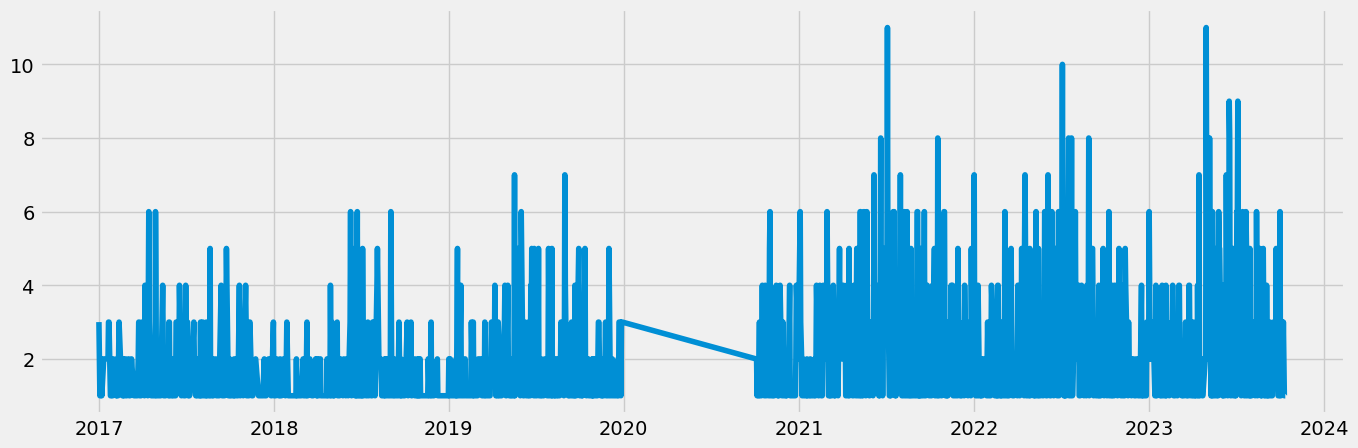

In [57]:
plt.figure(figsize=(15,5), dpi=100) 
    

plt.plot(result_1)

In [58]:
# Check for missing values (you shouldn't have any)

result_1.isnull().sum()

Incident Date    0
dtype: int64

In [59]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(result_1, model='additive', period=365)

In [60]:
from pylab import rcParams # This will define a fixed size for all special charts,

rcParams['figure.figsize'] = 18, 7

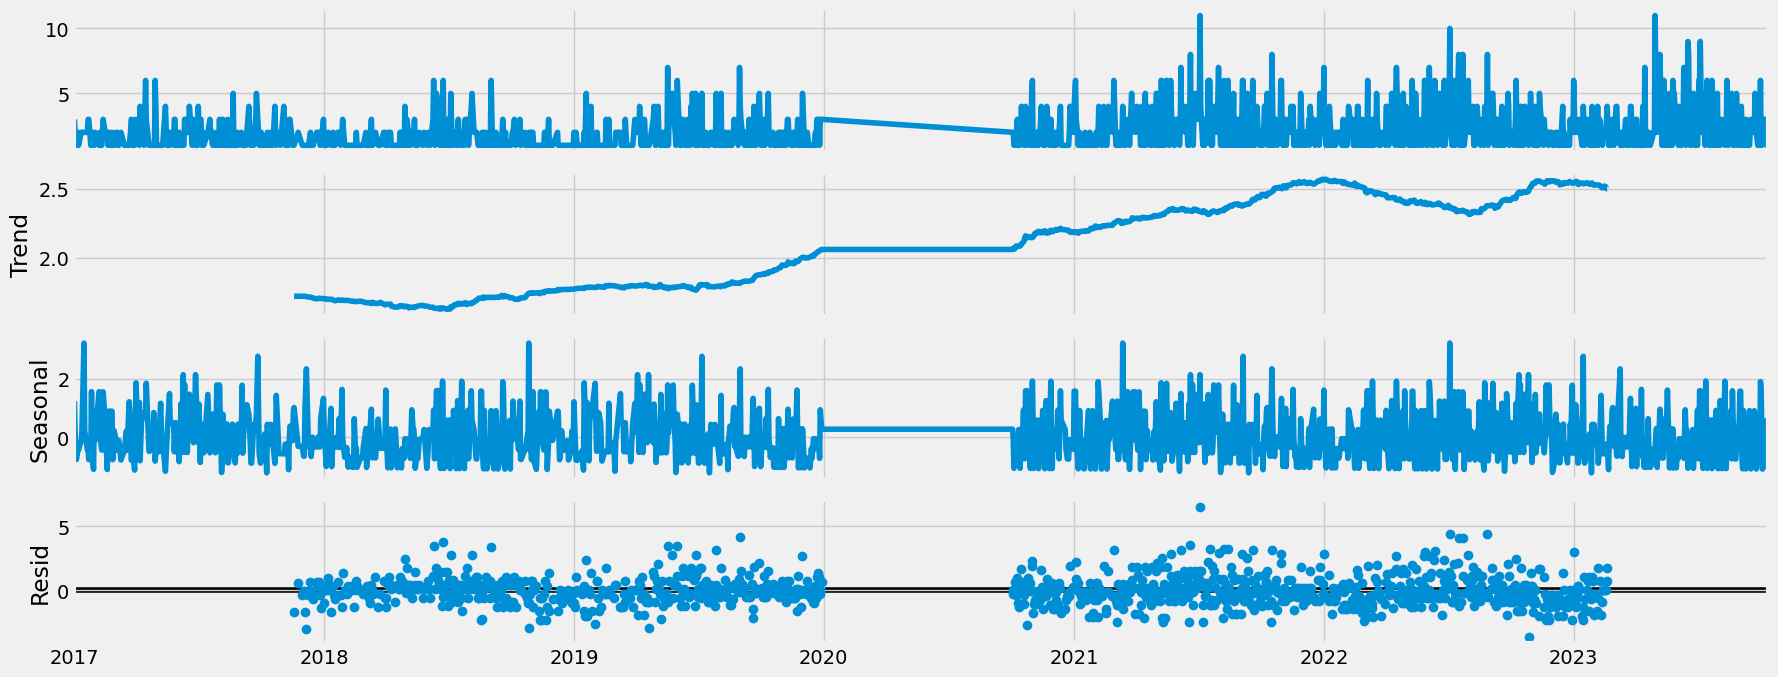

In [61]:
# Plot the separate components

decomposition.plot()
plt.show()

In [62]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(result_1['Incident Date'])

Dickey-Fuller Stationarity test:
Test Statistic                   -3.871597
p-value                           0.002254
Number of Lags Used              22.000000
Number of Observations Used    1430.000000
Critical Value (1%)              -3.434931
Critical Value (5%)              -2.863563
Critical Value (10%)             -2.567847
dtype: float64


#### test statistic is very close to the critical value. no need to stationarize the data due to the statistic being less than critical value.

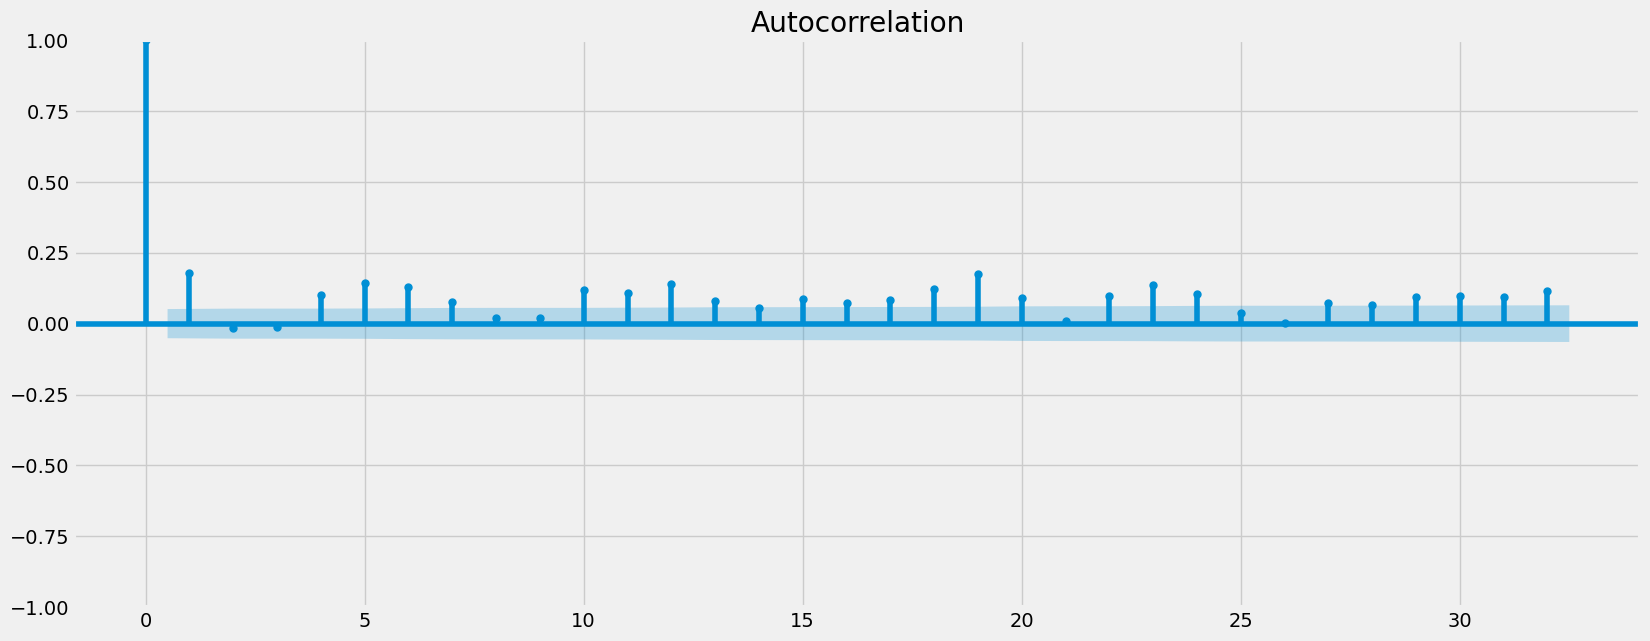

In [63]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(result_1)
plt.show()

In [64]:
# saving to csv
Shootings.to_csv(os.path.join(path, '02 Data','prepared data', 'shootings_67.csv'))